In [1]:
# handle imports
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# load data
news_data2 = pd.read_csv('updated_news_data.csv')

In [3]:
# for empty strings replace with NaN
news_data2 = news_data2.fillna('')

In [4]:
test = True

# list to store all entries
all_entries = []

# loop and add entry/entries to the list
for col in [f'Top{i}' for i in range(1, 26)]:
    # get top 1 to 25
    col_data = news_data2[col]
    for item in col_data:
        all_entries.append(item)

if test:
    print(len(all_entries))
    print(all_entries[0:10])

46475
['North Korea to open its sky, South Korean media reports.', "'What have they got to fear? ' Trump threatens to declassify FBI and Justice Department files on surveillance 'abuse' and Clinton email probe because of DOJ slow release to Congress", 'Hollywood isn’t simply churning out crummy remakes of nice movies anymore — now it’s doing terrible remakes of mediocre movies. For proof, see “Overboard.” Or, moderately, don’t. Who wants an up to date model of that weird Goldie Hawn-Kurt Russell comedy through which a wealthy girl tumbles off h', "Donald Trump says London hospital is 'like a war zone for stabbing wounds' as he defends US gun laws", 'Missing teen’s mom implores Canada to take notes from U.S. on searches: “We really need to, I think, restructure and reorganize how we look for missing children,” Paula Bali, mother of Mekayla Bali, said Friday.', 'How To Buy A Mattress In 2018', 'Over 26,000 people have crossed the border into Canada illegally since last year, but only 1% 

In [5]:
# reuse of HW, W3S1 w/ mod

## Jaccard similarity between lists <a> and <b>
def jaccard(a,b):
    sa = set(a)
    sb = set(b)

    # adding in this part to avoid the 0 errors
    if len(sa.union(sb)) == 0:
        return 0

    return len(sa.intersection(sb))/len(sa.union(sb))

# Utility function to print the shape of an array of arrays
def printshape(lx):
    print('shape: '+str(len(lx))+' x '+str(len(lx[0])))

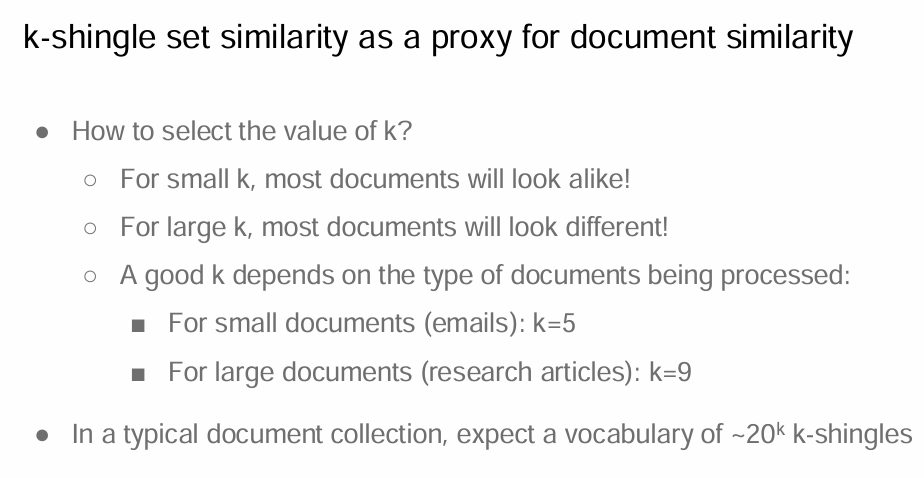

In [6]:
# reuse of HW, W3S1 w/ mod

# Extract k-shingles
k = 5
shingles = [[item[n:n+k] for n in range(len(item)-k+1)] for item in all_entries]
print('length: '+str(len(shingles)))
print('shingles[0]: '+str(shingles[0]))

length: 46475
shingles[0]: ['North', 'orth ', 'rth K', 'th Ko', 'h Kor', ' Kore', 'Korea', 'orea ', 'rea t', 'ea to', 'a to ', ' to o', 'to op', 'o ope', ' open', 'open ', 'pen i', 'en it', 'n its', ' its ', 'its s', 'ts sk', 's sky', ' sky,', 'sky, ', 'ky, S', 'y, So', ', Sou', ' Sout', 'South', 'outh ', 'uth K', 'th Ko', 'h Kor', ' Kore', 'Korea', 'orean', 'rean ', 'ean m', 'an me', 'n med', ' medi', 'media', 'edia ', 'dia r', 'ia re', 'a rep', ' repo', 'repor', 'eport', 'ports', 'orts.']


In [7]:
shingles2 = [[item[n:n+k] for n in range(len(item)-k+1)] for item in ["China Bought Russia"]]
print('shingles2: '+str(shingles2))

shingles2: [['China', 'hina ', 'ina B', 'na Bo', 'a Bou', ' Boug', 'Bough', 'ought', 'ught ', 'ght R', 'ht Ru', 't Rus', ' Russ', 'Russi', 'ussia']]


In [8]:
# reuse of HW, W3S1 w/ mod

#  Compute actual jaccard similarities among all pairs of data samples
similarities = []

all_len = len(shingles)
one_len = len(["China Bought Russia"])

df = pd.DataFrame(columns=['items', 'jaccard'])
df.to_csv('similarities.csv', mode='w', header=True, index=False)

sim  = []

for k in range(len(shingles)):
    for m in range(len(shingles2)):
        jsim = jaccard(shingles[k], shingles2[m])

        sim.append([k, m, jsim])
        with open('jac_sim.csv', mode='a', newline='') as file:
            df = pd.DataFrame([{'items': str(k) + ':shingles2[' + str(m) + ']', 'jaccard': jsim}])
            df.to_csv(file, header=False, index=False)

# similarities = pd.DataFrame(similarities)
# similarities.shape


# print(similarities)

In [9]:
print(sim[0:100])

[[0, 0, 0.0], [1, 0, 0.0], [2, 0, 0.00684931506849315], [3, 0, 0.0], [4, 0, 0.0], [5, 0, 0.0], [6, 0, 0.0], [7, 0, 0.012987012987012988], [8, 0, 0.0], [9, 0, 0.0], [10, 0, 0.0], [11, 0, 0.030303030303030304], [12, 0, 0.0], [13, 0, 0.0], [14, 0, 0.0], [15, 0, 0.0], [16, 0, 0.02531645569620253], [17, 0, 0.0], [18, 0, 0.0], [19, 0, 0.021505376344086023], [20, 0, 0.0], [21, 0, 0.0], [22, 0, 0.0], [23, 0, 0.03260869565217391], [24, 0, 0.0], [25, 0, 0.0], [26, 0, 0.0], [27, 0, 0.0], [28, 0, 0.016483516483516484], [29, 0, 0.0], [30, 0, 0.034482758620689655], [31, 0, 0.0], [32, 0, 0.0], [33, 0, 0.0], [34, 0, 0.0], [35, 0, 0.0], [36, 0, 0.0], [37, 0, 0.0], [38, 0, 0.0], [39, 0, 0.0], [40, 0, 0.0], [41, 0, 0.0], [42, 0, 0.0], [43, 0, 0.0], [44, 0, 0.006329113924050633], [45, 0, 0.0], [46, 0, 0.0], [47, 0, 0.0], [48, 0, 0.0], [49, 0, 0.0], [50, 0, 0.0], [51, 0, 0.0], [52, 0, 0.0], [53, 0, 0.0], [54, 0, 0.0], [55, 0, 0.0], [56, 0, 0.0], [57, 0, 0.0], [58, 0, 0.0], [59, 0, 0.0], [60, 0, 0.0], [61, 

In [10]:
#sim2 = sorted(sim, key=lambda x: x['jaccard'], reverse=True)
sim2 = sorted(sim, key=lambda x: x[2], reverse=True)

print(sim2[0:10])

[[43374, 0, 0.25], [46079, 0, 0.13559322033898305], [5713, 0, 0.11363636363636363], [26162, 0, 0.11363636363636363], [9071, 0, 0.10204081632653061], [5212, 0, 0.1], [1807, 0, 0.0967741935483871], [40468, 0, 0.09302325581395349], [5485, 0, 0.09090909090909091], [13896, 0, 0.08928571428571429]]


In [11]:
for i in range(10):
    print(all_entries[sim2[i][0]])

#print(all_entries[43374])
#print(all_entries[46079])

China Bought Russia's S-400 Missiles, Taiwan Now Needs More SAMs
India bought Russian oil at a discount of $35 per barrel
Can Russia and China trust each other?
Can Russia and China trust each other?
China and Russia Forging a New World Order?
Serbia showcases artillery bought from Russia and China
US to help Moldova fight Russia's destabilization efforts
SWIFT ban approuved against Russia !
So much freedom in Russia
Who Russia, China and Iran want to win US election
